# In Multiple Regression Analysis , We have many IND VAR --> one DEP VAR 


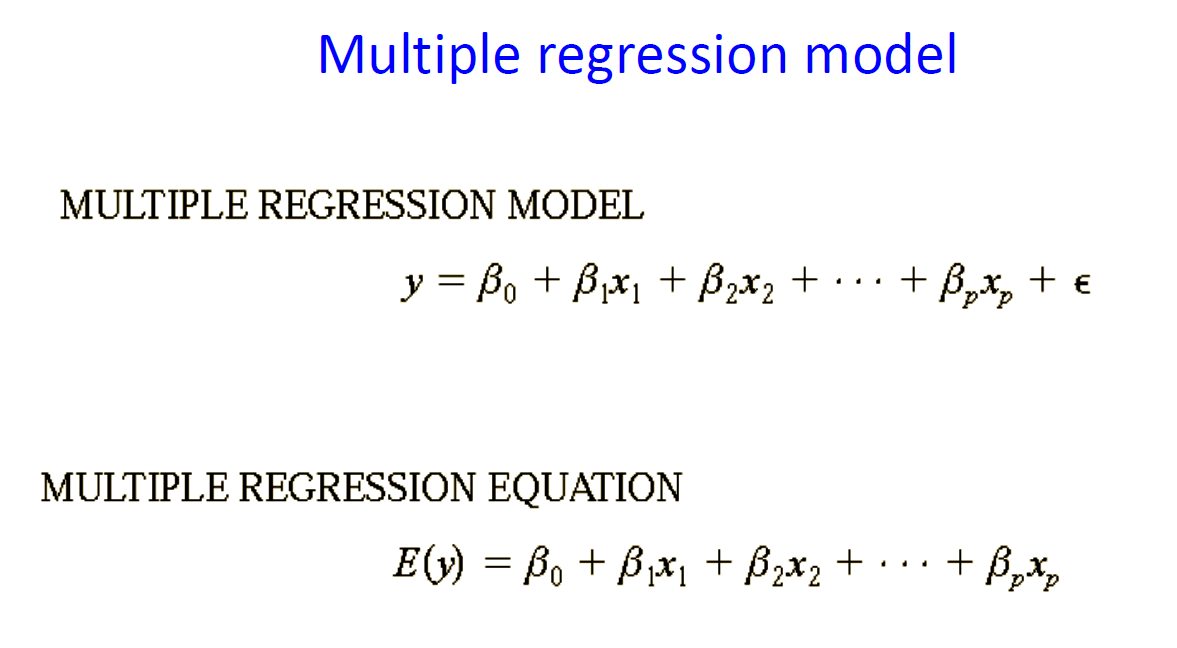

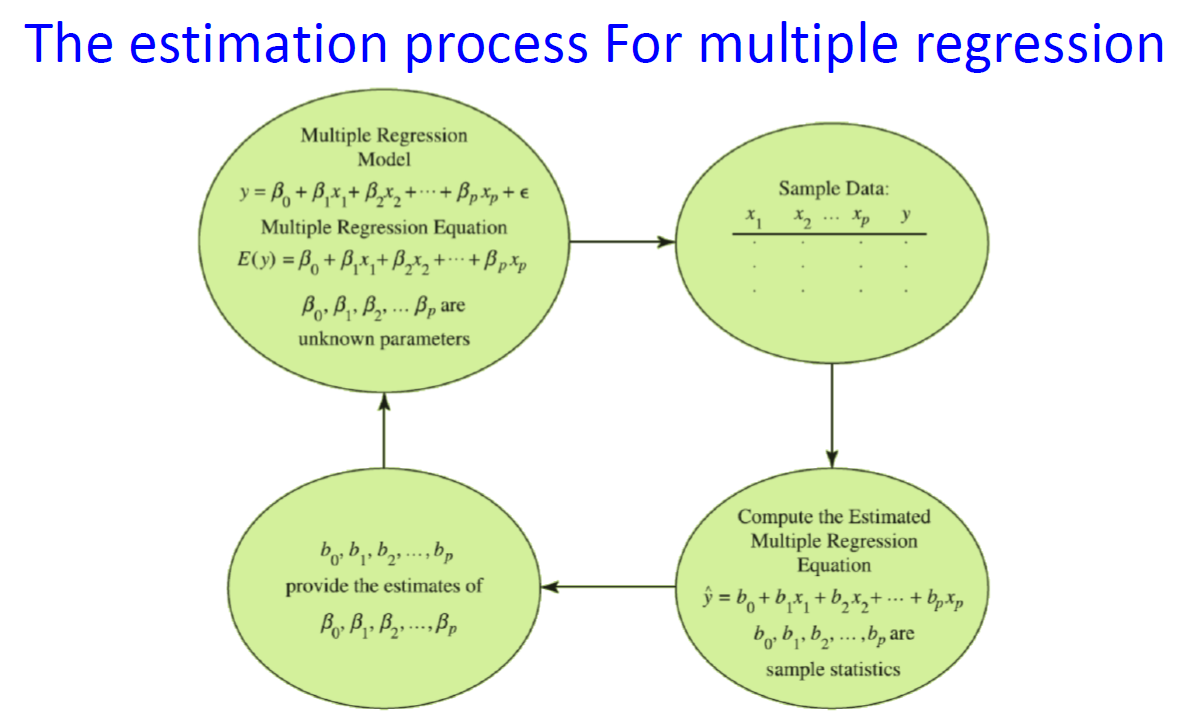

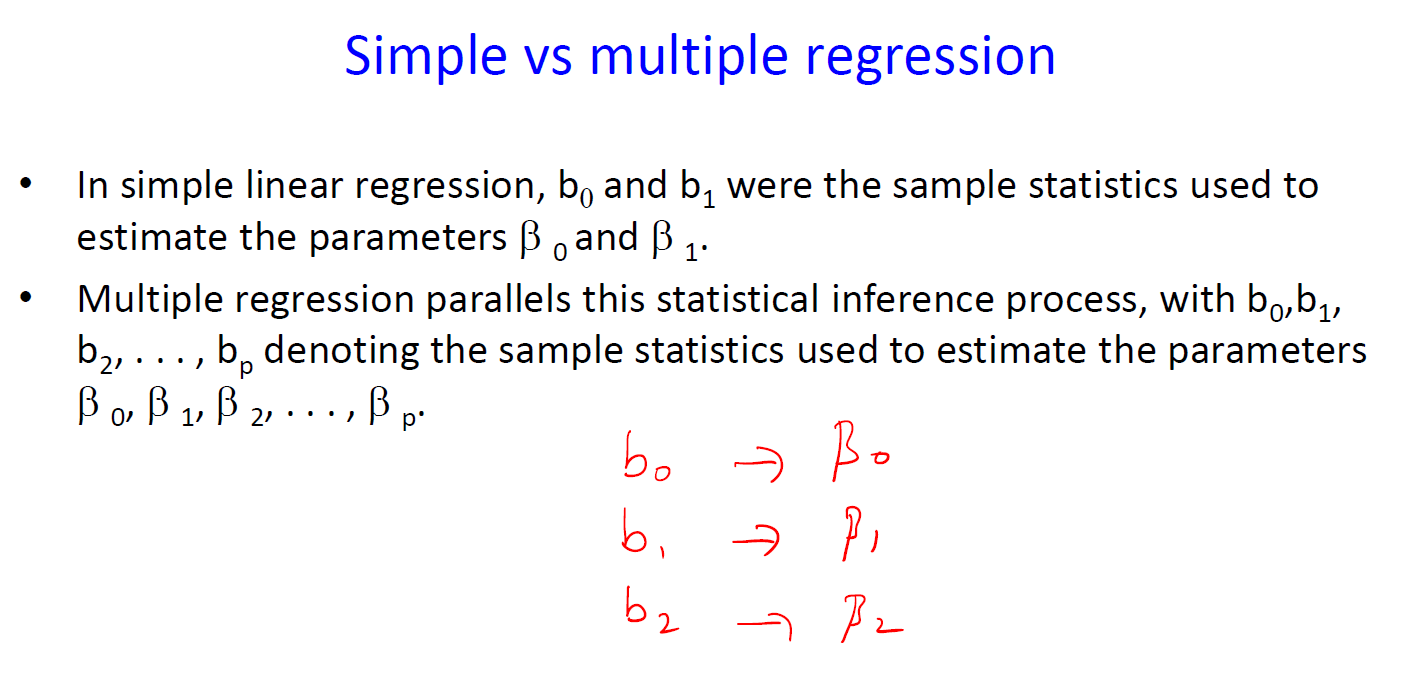

# PROBLEM 

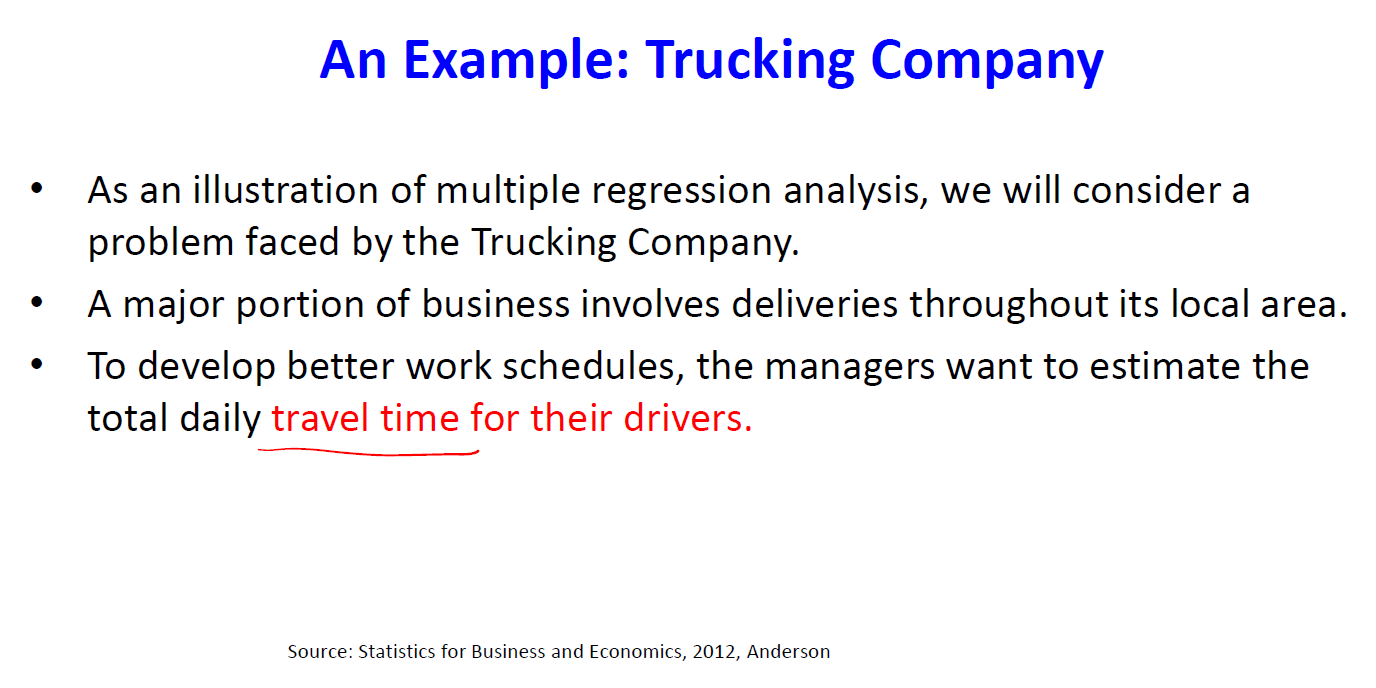


In [8]:
import pandas as pd
import statsmodels.formula.api as sfa 


df =  pd.read_excel(r'D:\ERA_ML\IIT Roorkee\Dataset\week_7\Week 7 (Important Data)-20220425T104054Z-001\Week 7 (Important Data)\TRUCKING.xlsx')
df

,Driving Assignmnet,x1,n_of_deliveries,travel_time
0,1,100,4,9.3
1,2,50,3,4.8
2,3,100,4,8.9
3,4,100,2,6.5
4,5,50,2,4.2
5,6,80,2,6.2
6,7,75,3,7.4
7,8,65,4,6.0
8,9,90,3,7.6
9,10,90,2,6.1


In [9]:
# Considering only one IND VAR x1
reg = sfa.ols('travel_time ~ x1',data=df).fit()
reg.summary()


C:\Users\Z028726\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     15.81
Date:                Mon, 16 May 2022   Prob (F-statistic):            0.00408
Time:                        06:42:19   Log-Likelihood:                -13.092
No. Observations:                  10   AIC:                             30.18
Df Residuals:                       8   BIC:                             30.79
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2739      1.401      0.909      0.390      -1.956       4.504
x1             0.0678      0.017      3.977      0.004       0.028       0.107
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   1.723
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.623
Skew:                          -0.333   Prob(JB):                        0.732
Kurtosis:                       1.974   Cond. No.                         363.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
from statsmodels.stats.anova import anova_lm
anova_lm(reg)

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,15.814578,0.00408
Residual,8.0,8.028696,1.003587,NaN,NaN


In [14]:
SSE = 8.02
SSR = 15.87
SST = SSR + SSE
SST


23.89

In [11]:
# Considering two IND VAR x1, n_of_deliveries

reg = sfa.ols('travel_time ~ x1+n_of_deliveries',data=df).fit()
reg.summary()

C:\Users\Z028726\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            travel_time   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     32.88
Date:                Mon, 16 May 2022   Prob (F-statistic):           0.000276
Time:                        06:42:19   Log-Likelihood:                -6.8398
No. Observations:                  10   AIC:                             19.68
Df Residuals:                       7   BIC:                             20.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8687      0.952     -0.913      0.392      -3.119       1.381
x1                  0.0611      0.010      6.182      0.000       0.038       0.085
n_of_deliveries     0.9234      0.221      4.176      0.004       0.401       1.446
==============================================================================
Omnibus:                        0.039   Durbin-Watson:                   2.515
Prob(Omnibus):                  0.981   Jarque-Bera (JB):                0.151
Skew:                           0.074   Prob(JB):                        0.927
Kurtosis:                       2.418   Cond. No.                         435.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from statsmodels.stats.anova import anova_lm
anova_lm(reg)


,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,15.871304,15.871304,48.315660,0.000221
n_of_deliveries,1.0,5.729252,5.729252,17.441075,0.004157
Residual,7.0,2.299443,0.328492,NaN,NaN


In [18]:
SSE = 2.3
SSR = 15.87+5.73
print('SSR aft', SSR)
SST = SSR + SSE
print(SST)

SSR aft 21.6
23.900000000000002


Before and after adding IND VAR to analysis 

SST (bef) : 23.89  SSR (aft) : 23.9

SSR (bef) : 15.87   SSR (aft) : 21.6

Since SSR is increased R^2 increases

# Interpretation:
#### The R^2 for one IND VAR x1 = 0.662
#### The R^2 for two IND VAR x1 and n_of_deliveries = 0.904
#### This implies that the two ind var model fits the data well. 
    
#### 90 percent of data can be explained with two independent variable
    

# What determines whether to add IND VAR to analysis or not?

It is adjusted R^2 

Just check before and after adding IND VAR to analysis , if the value of adjusted R^2 decreases , the variabke we added is not going to explain anything , it is NOISE Variable. 